<a href="https://colab.research.google.com/github/airoud/House-Prices---Advanced-Regression-Techniques/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the librairies

In [56]:
# Import the librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Import the score metric 

from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore')

## Data Exploring

In [3]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [4]:
df.shape

(1460, 81)

In [ ]:
# NUmber of columns that contains NaN values
len(df.columns[df.isna().any()])

19

In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

### Categorical Variables

In [6]:
cat_df = df.loc[:, df.dtypes == object]
cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
df.loc[:, df.dtypes == object].isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [10]:
missing_cat_per = cat_df.columns[df.loc[:, df.dtypes == object].isna().any()]
len(missing_cat_per)

16

In [11]:
for e in missing_cat_per:
    print('Percentage of missing values in', e,'is',round(df[e].isna().sum()/len(df)*100,2),'%')

# We can choose a threshold for the missing values 

Percentage of missing values in Alley is 93.77 %
Percentage of missing values in MasVnrType is 0.55 %
Percentage of missing values in BsmtQual is 2.53 %
Percentage of missing values in BsmtCond is 2.53 %
Percentage of missing values in BsmtExposure is 2.6 %
Percentage of missing values in BsmtFinType1 is 2.53 %
Percentage of missing values in BsmtFinType2 is 2.6 %
Percentage of missing values in Electrical is 0.07 %
Percentage of missing values in FireplaceQu is 47.26 %
Percentage of missing values in GarageType is 5.55 %
Percentage of missing values in GarageFinish is 5.55 %
Percentage of missing values in GarageQual is 5.55 %
Percentage of missing values in GarageCond is 5.55 %
Percentage of missing values in PoolQC is 99.52 %
Percentage of missing values in Fence is 80.75 %
Percentage of missing values in MiscFeature is 96.3 %


**We use the mode to replace the missing values**

In [21]:
for c in cat_df.columns:
  cat_df[c]=cat_df[c].fillna(cat_df[c].mode()[0])
cat_df.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [22]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
cols = cat_df.columns
enc_cat_df = encoder.fit_transform(cat_df)
enc_cat_df = pd.DataFrame(enc_cat_df, columns=cols)
enc_cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,3.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,3.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1456,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,1.0,9.0,10.0,3.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,1.0,4.0,1.0,4.0,3.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1457,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,5.0,5.0,2.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,0.0,2.0,8.0,4.0
1458,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,2.0,1.0,0.0,2.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0


In [23]:
enc_cat_df.dtypes

MSZoning         float64
Street           float64
Alley            float64
LotShape         float64
LandContour      float64
Utilities        float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinType2     float64
Heating          float64
HeatingQC        float64
CentralAir       float64
Electrical       float64
KitchenQual      float64
Functional       float64
FireplaceQu      float64
GarageType       float64
GarageFinish     float64
GarageQual       float64
GarageCond       float64
PavedDrive       float64
PoolQC           float64
Fence            float64


### Numerical Data

In [24]:
num_df = df.loc[:, df.dtypes != object]
num_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [25]:
num_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
num_df.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [27]:
print(round(df['LotFrontage'].isna().sum()/len(df)*100,2),'%')

17.74 %


In [ ]:
print(round(df['GarageYrBlt'].isna().sum()/len(df)*100,2),'%')

5.55 %


In [ ]:
print(round(df['MasVnrArea'].isna().sum()/len(df),2),'%')

0.01 %


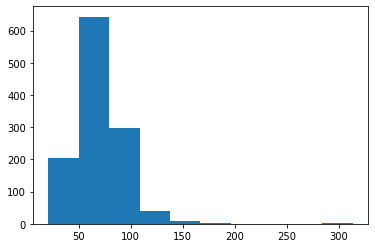

In [29]:
plt.hist(df['LotFrontage'])
plt.show()

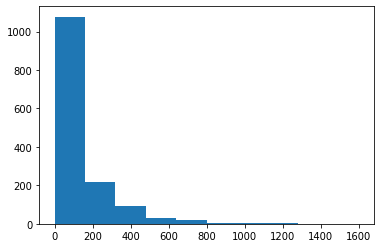

In [30]:
plt.hist(df['MasVnrArea'])
plt.show()

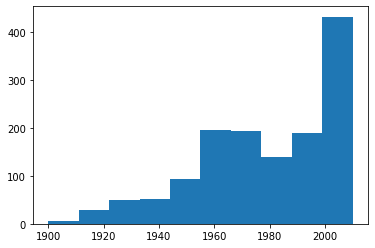

In [31]:
plt.hist(df['GarageYrBlt'])
plt.show()

In [32]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy="most_frequent")
num_cols = num_df.columns
enc_num_df = imp.fit_transform(num_df)
num_df = pd.DataFrame(enc_num_df, columns=num_cols)
num_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1950.0,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [33]:
num_df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [34]:
df.drop(cat_df.columns, axis=1, inplace=True)
df.drop(num_df.columns, axis=1,inplace=True)
df=pd.concat([num_df,enc_cat_df], axis=1)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,...,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,3.0,1.0,...,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,3.0,1.0,...,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,3.0,1.0,...,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3.0,1.0,...,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,1.0,9.0,10.0,3.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,1.0,4.0,1.0,4.0,3.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0,3.0,1.0,...,3.0,3.0

### Target Variabe ###

In [35]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

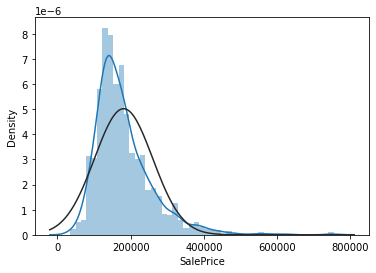

In [36]:
from scipy.stats import norm
sns.distplot(df['SalePrice'], fit=norm)
plt.show()

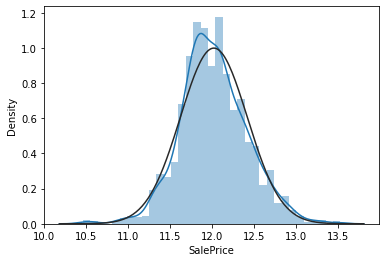

In [38]:
sns.distplot(np.log(df['SalePrice']), fit=norm)
plt.show()

In [40]:
# We can use the log transformation and test after 
# df['SalePrice]= np.log(df['SalePrice'])

### Dealing with Outliers




#### Using Zscore

In [133]:
from scipy.stats import zscore
z = np.abs(zscore(df))

(1460, 81)


In [150]:
zout_df = df[(z < 3).all(axis=1)]
zout_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,...,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,3.0,1.0,...,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3.0,1.0,...,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
6,7.0,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,0.0,317.0,1686.0,1694.0,0.0,0.0,1694.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,2004.0,2.0,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,307000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
10,11.0,20.0,70.0,11200.0,5.0,5.0,1965.0,1965.0,0.0,906.0,0.0,134.0,1040.0,1040.0,0.0,0.0,1040.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1965.0,1.0,384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,129500.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,1.0,6.0,6.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1447.0,20.0,60.0,26142.0,5.0,7.0,1962.0,1962.0,189.0,593.0,0.0,595.0,1188.0,1188.0,0.0,0.0,1188.0,0.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,1962.0,1.0,312.0,261.0,39.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,157900.0,3.0,1.0,...,0.0,3.0,0.0,1.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,1.0,6.0,6.0,1.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,5.0,1.0,4.0,1.0,4.0,3.0,6.0,2.0,1.0,2.0,4.0,4.0,1.0,2.0,2.0,2.0,8.0,4.0
1447,1448.0,60.0,80.0,10000.0,8.0,5.0,1995.0,1996.0,438.0,1079.0,0.0,141.0,1220.0,1220.0,870.0,0.0,2090.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,1.0,1995.0,2.0,556.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,12.0,2007.0,240000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1451,1452.0,20.0,78.0,9262.0,8.0,5.0,2008.0,2009.0,194.0,0.0,0.0,1573.0,1573.0,1578.0,0.0,0.0,1578.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,2008.0,3.0,840.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0,287090.0,3.0,1.0,...

#### Using Interquartile Range

In [158]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1 

In [157]:
df_out = df[~((df< (Q1 - 2 * IQR)) |(df > (Q3 + 2 * IQR))).any(axis=1)]
df_out.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,...,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
6,7.0,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,0.0,317.0,1686.0,1694.0,0.0,0.0,1694.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,2004.0,2.0,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,307000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
27,28.0,20.0,98.0,11478.0,8.0,5.0,2007.0,2008.0,200.0,1218.0,0.0,486.0,1704.0,1704.0,0.0,0.0,1704.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,2008.0,3.0,772.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,306000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
31,32.0,20.0,60.0,8544.0,5.0,6.0,1966.0,2006.0,0.0,0.0,0.0,1228.0,1228.0,1228.0,0.0,0.0,1228.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1966.0,1.0,271.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,149350.0,3.0,1.0,...,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,1.0,6.0,6.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
32,33.0,20.0,85.0,11049.0,8.0,5.0,2007.0,2007.0,0.0,0.0,0.0,1234.0,1234.0,1234.0,0.0,0.0,1234.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,0.0,2007.0,2.0,484.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,179900.0,3.0,1.0,...,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,2.0,2.0,4.0,2.0,0.0,3.0,0.0,5.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
35,36.0,60.0,108.0,13418.0,8.0,5.0,2004.0,2005.0,132.0,0.0,0.0,1117.0,1117.0,1132.0,1320.0,0.0,2452.0,0.0,0.0,3.0,1.0,4.0,1.0,9.0,1.0,2004.0,3.0,691.0,113.0,32.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,309000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,3.0,0.0,5.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
36,37.0,20.0,112.0,10859.0,5.0,5.0,1994.0,1995.0,0.0,0.0,0.0,1097.0,1097.0,1097.0,0.0,0.0,1097.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1995.0,2.0,672.0,392.0,64.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,145000.0,3.0,1.0,...,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
49,50.0,20.0,66.0,7742.0,5.0,7.0,1966.0,1966.0,0.0,763.0,0.0,192.0,955.0,955.0,0.0,0.0,955.0,1.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,1966.0,1.0,386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0,127000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,1.0,6.0,6.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,1.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
57,58.0,60.0,89.0,11645.0,7.0,5.0,2004.0,2004.0,0.0,0.0,0.0,860.0,860.0,860.0,860.0,0.0,1720.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,0.0,2004.0,2.0,565.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,196

In [156]:
df.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,...,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,3.0,1.0,...,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,3.0,1.0,...,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,3.0,1.0,...,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3.0,1.0,...,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
5,6.0,50.0,85.0,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,0.0,64.0,796.0,796.0,566.0,0.0,1362.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,1993.0,2.0,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,143000.0,3.0,1.0,...,0.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,0.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,5.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
6,7.0,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,0.0,317.0,1686.0,1694.0,0.0,0.0,1694.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,2004.0,2.0,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,307000.0,3.0,1.0,...,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
7,8.0,60.0,60.0,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,32.0,216.0,1107.0,1107.0,983.0,0.0,2090.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,2.0,1973.0,2.0,484.0,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,200000.0,3.0,1.0,...,0.0,3.0,0.0,0.0,0.0,14.0,4.0,2.0,0.0,5.0,1.0,1.0,6.0,6.0,3.0,3.0,4.0,1.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
8,9.0,50.0,51.0,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,0.0,952.0,952.0,1022.0,752.0,0.0,1774.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,2.0,1931.0,2.0,468.0,90.0,0.0,205.0,0.0,0.0,0.0,0.0,4

##Model Building

### Spliting and Scaling our Data ###

In [153]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

X=df.drop(['SalePrice','Id'], axis =1, errors='ignore')
y=df['SalePrice']


X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=48)
# We can use RobustScaler which is more rbust to outliers
#rb_scaler = RobustScaler()
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

PCA before using our Model

In [69]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
pca.fit(X_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)

In [70]:
X_pca_train.shape

(1022, 5)

### Building Our Model

####Decisioon Tree Regressor

In [162]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [117]:
dt.score(X_test, y_test)

0.683200667316076

In [181]:
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import StratifiedKFold

#cross validation dataset check
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
    return (rmse)

cv_rmse(dt).mean()

43712.57330238601

####Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9795057848593065

In [78]:
rf.score(X_test, y_test)

0.8365986804388421

####Linear Regression Model

In [166]:
from sklearn.linear_model import LinearRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.17318982387475537

####Lasso Linear Model

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.880721245585092

In [80]:
lasso.score(X_test, y_test)

0.7006773472324999

####KNeighbors Regressor Model

In [168]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.7648525927341113

In [169]:
knn.score(X_test, y_test)

0.6453973258968679

####XGB Regressor

In [170]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train) 

[22:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.968365371647588

In [171]:
xgb.score(X_test, y_test)

0.8793220853649709

In [174]:
np.sqrt(mean_squared_error(xgb.predict(X_test), y_test))

25950.36213675505

In [182]:
score_dtr  = cv_rmse(xgb)
print("Mean root mean sqr error: ",round(score_dtr.mean(),4))

[22:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

####Bayesian Ridge Model

In [85]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
br.score(X_train, y_train)

0.8736503699610755

In [87]:
br.score(X_test, y_test)

0.6752029866131213

####Ridge Model

In [88]:
from sklearn.linear_model import Ridge

rd = Ridge()
rd.fit(X_train, y_train)
rd.score(X_train, y_train)

0.8802061049337007

In [89]:
rd.score(X_test, y_test)

0.6954215768941405

## Test Dataset

In [204]:
test_df = pd.read_csv('test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

### Categorical Variables

In [205]:
test_cat_df = test_df.loc[:, test_df.dtypes == object]
test_cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [206]:
test_df.loc[:, test_df.dtypes == object].isna().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [207]:
missing_cat_test = test_cat_df.columns[test_cat_df.loc[:, test_df.dtypes == object].isna().any()]
len(missing_cat_test)

22

In [208]:
for e in missing_cat_test:
    print('Percentage of missing values in', e,'is',round(test_df[e].isna().sum()/len(test_df)*100,2),'%')

# We can choose a threshold for the missing values 

Percentage of missing values in MSZoning is 0.27 %
Percentage of missing values in Alley is 92.67 %
Percentage of missing values in Utilities is 0.14 %
Percentage of missing values in Exterior1st is 0.07 %
Percentage of missing values in Exterior2nd is 0.07 %
Percentage of missing values in MasVnrType is 1.1 %
Percentage of missing values in BsmtQual is 3.02 %
Percentage of missing values in BsmtCond is 3.08 %
Percentage of missing values in BsmtExposure is 3.02 %
Percentage of missing values in BsmtFinType1 is 2.88 %
Percentage of missing values in BsmtFinType2 is 2.88 %
Percentage of missing values in KitchenQual is 0.07 %
Percentage of missing values in Functional is 0.14 %
Percentage of missing values in FireplaceQu is 50.03 %
Percentage of missing values in GarageType is 5.21 %
Percentage of missing values in GarageFinish is 5.35 %
Percentage of missing values in GarageQual is 5.35 %
Percentage of missing values in GarageCond is 5.35 %
Percentage of missing values in PoolQC is 99.

In [209]:
for c in test_cat_df.columns:
  test_cat_df[c]=test_cat_df[c].fillna(test_cat_df[c].mode()[0])
test_cat_df.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [210]:
test_cols = test_cat_df.columns
enc_cat_test_df = encoder.fit_transform(test_cat_df)
test_cat_df = pd.DataFrame(enc_cat_test_df, columns=cols)
test_cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,2.0,0.0,2.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,3.0,0.0,4.0,1.0,3.0,3.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
1,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,0.0,11.0,13.0,1.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,0.0,4.0,1.0,3.0,2.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,0.0,8.0,4.0
2,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,3.0,3.0,6.0,4.0,1.0,0.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
3,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,10.0,12.0,1.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,3.0,2.0,6.0,2.0,1.0,0.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
4,3.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,22.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,2.0,2.0,4.0,2.0,2.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,3.0,2.0,6.0,2.0,1.0,1.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,3.0,4.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,5.0,0.0,2.0,1.0,3.0,3.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
1455,4.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,4.0,4.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,5.0,0.0,4.0,1.0,3.0,3.0,6.0,2.0,4.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,0.0
1456,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,3.0,3.0,6.0,4.0,5.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,0.0
1457,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,14.0,2.0,3.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,0.0,4.0,1.0,3.0,3.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0


### Numerical Variables

In [211]:
test_num_df = test_df.loc[:, test_df.dtypes != object]
test_num_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [212]:
test_num_df.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [226]:
test_df.drop(test_cat_df.columns, axis=1, inplace=True, errors='ignore')
test_df.drop(test_num_df.columns, axis=1,inplace=True, errors='ignore')
test_df=pd.concat([test_num_df,test_cat_df], axis=1)
test_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,2.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,2.0,0.0,2.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,3.0,0.0,4.0,1.0,3.0,3.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,0.0,11.0,13.0,1.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,0.0,4.0,1.0,3.0,2.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,0.0,8.0,4.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,3.0,3.0,6.0,4.0,1.0,0.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,10.0,12.0,1.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,3.0,2.0,6.0,2.0,1.0,0.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,3.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,22.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,2.0,2.0,4.0,2.0,2.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,3.0,2.0,6.0,2.0,1.0,1.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006,4.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,3.0,4.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,5.0,0.0,2.0,1.0,3.0,3.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,4.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,4.0,4.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,5.0,0.0,4.0,1.0,3.0,3.0,6.0,2.0,4.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,0.0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,3.0,3.0,6.0,4.0,5.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,0.0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,14.0,2.0,3.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,0.0,4.0,1.0,3.0,3.0,6.0,2.0,1.0,2.0,3.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0


### Submission 

In [227]:
soumission = test_df['Id']
soumission

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [228]:
test_df.drop('Id', axis=1, inplace=True, errors='ignore')

In [237]:
y_pred_xgb = xgb.predict(test_df)
y_pred_xgb

array([122637.45, 173543.75, 171197.95, ..., 171375.03, 122411.85,
       227412.16], dtype=float32)

In [238]:
y_pred_xgb = pd.DataFrame(y_pred, columns=['SalePrice'])
y_pred_xgb

,SalePrice
0,122637.453125
1,173543.750000
2,171197.953125
3,186420.640625
4,196084.203125
...,...
1454,83926.453125
1455,84807.617188
1456,171375.031250
1457,122411.851562


In [245]:
#soumission = pd.concat([soumission, y_pred_xgb], axis=1)
xgb_soumission = soumission
xgb_soumission

,Id,SalePrice
0,1461,122637.453125
1,1462,173543.750000
2,1463,171197.953125
3,1464,186420.640625
4,1465,196084.203125
...,...,...
1454,2915,83926.453125
1455,2916,84807.617188
1456,2917,171375.031250
1457,2918,122411.851562


In [246]:
xgb_soumission.to_csv('xgb_soumission.csv', index=False)